In [ ]:
import data
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

assets = ["BTCUSDT", "DOGEUSDT", "ETHUSDT", "SOLUSDT", "XRPUSDT"]
dfs = [
    data.load_asset(asset, sampling="1d") for asset in assets
]
for df in dfs:
    df['Return'] = df['Close'].pct_change()
    df.dropna(inplace=True)   
dfs = [
    df[(df.index >= '2022-01-01') & (df.index <= '2025-01-01')] for df in dfs
]

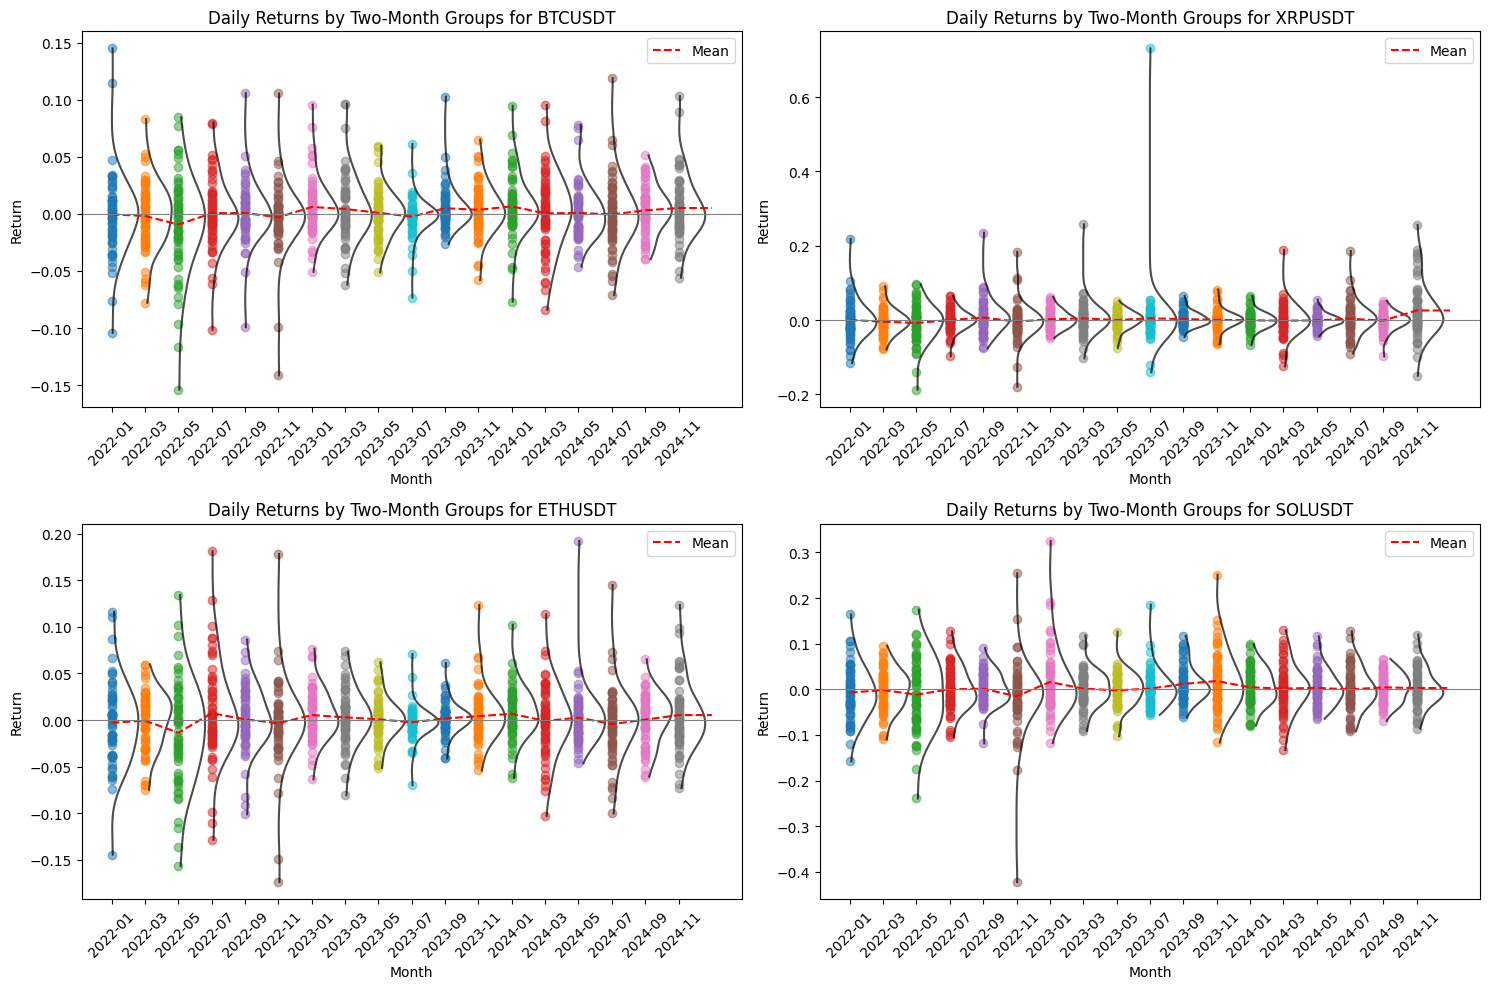

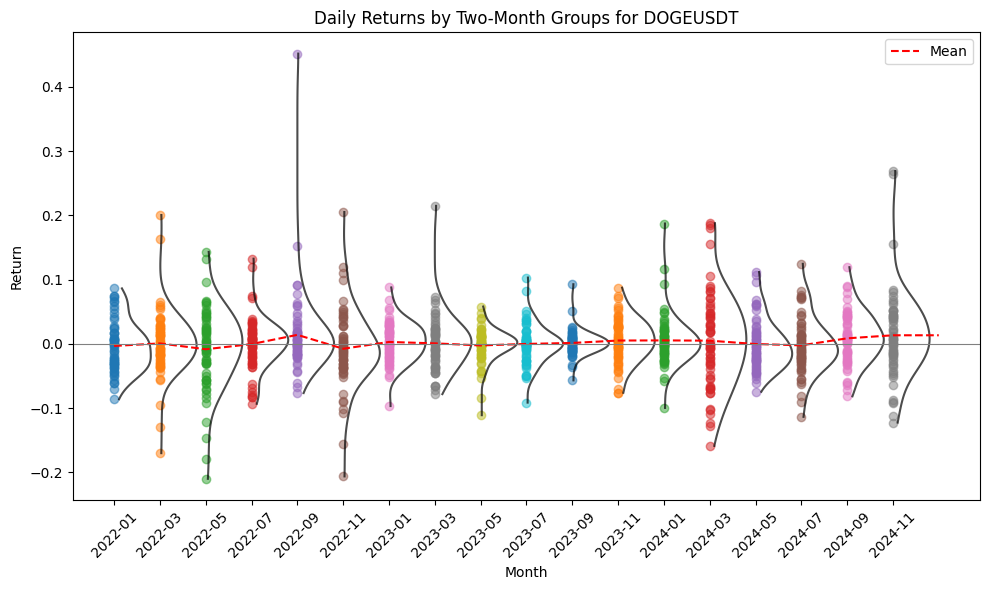

In [27]:
from scipy.stats import gaussian_kde

# iterate on each df in dfs
# create five figures (2x2 above, 1 centered below), with the name or each asset
# in each figure, group the returns for every two months (going year by year; this is not a seasonality analysis; this is an exploration of any remarkable shifts in the course of 3 years)
    # i.e. Jan-Feb 2022, Mar-Apr 2022, ..., Sept-Oct 2024, Nov-Dec 2024
# create a scatter plot where the grouped returns are scattered vertically for each month tick, horizontally
    # so it's a vertical line of scattered dots. the dots are all on the same vertical line
# also add an indicatory KDE distribution (oriented vertically) right next to the scatters
    # so its axis representing the value is vertical, and the axis representing the density is horizontal and squeezed into the space between the ticks
# also add a small horizontal red-dash indicating where the mean is on that vertical line of scattered dots
# (forget this: make sure that each scatter is the same color for each asset, but different colors for different assets (rather than different for each month))
# title the figures accordingly, to each asset (title Daily Returns by Month for ASSET)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()


for i, (asset, df) in enumerate(zip(assets[:4], dfs[:4])):
    df = df[df.index < '2025-01-01']

    ax = axes[i]
    grouped = df['Return'].groupby([(df.index.year), (df.index.month - 1) // 2])
    means = grouped.mean()
    
    for (year, month), group in grouped:
        x_vals = np.full_like(group, (year - 2022) * 6 + month)
        ax.scatter(x_vals, group, alpha=0.5)
        
        if len(group) > 1:  # Ensure there are at least two elements for KDE
            kde = gaussian_kde(group)
            x_vals_kde = np.linspace(group.min(), group.max(), 100)
            y_vals_kde = kde(x_vals_kde)
            y_vals_kde = y_vals_kde / y_vals_kde.max() * 0.8 + x_vals[0]  # Normalize and shift
            
            ax.plot(y_vals_kde, x_vals_kde, color='black', alpha=0.7)

    # Add a red dashed curve through the means of each month-group
    mean_x_vals = [(year - 2022) * 6 + month for year, month in means.index]
    mean_x_vals.append(mean_x_vals[-1] + 1)
    means = pd.concat([means, pd.Series(means.iloc[-1], index=[(2025, 0)])])
    ax.plot(mean_x_vals, means.values, 'r--', label='Mean')
    ax.axhline(0, color='gray', linewidth=0.8)
    
    ax.set_title(f'Daily Returns by Two-Month Groups for {asset}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Return')
    ax.set_xticks(range(0, 18))
    ax.set_xticklabels([f'{year}-{month * 2 + 1:02d}' for year in range(2022, 2025) for month in range(6)], rotation=45)
    ax.legend()

fig.tight_layout()
plt.show()
# Add the fifth asset (DOGEUSDT) to the plot
fig_doge, ax_doge = plt.subplots(figsize=(10, 6))

df_doge = dfs[4]
df_doge = df_doge[df_doge.index < '2025-01-01']
grouped_doge = df_doge['Return'].groupby([(df_doge.index.year), (df_doge.index.month - 1) // 2])
means_doge = grouped_doge.mean()

for (year, month), group in grouped_doge:
    x_vals = np.full_like(group, (year - 2022) * 6 + month)
    ax_doge.scatter(x_vals, group, alpha=0.5)
    
    if len(group) > 1:  # Ensure there are at least two elements for KDE
        kde = gaussian_kde(group)
        x_vals_kde = np.linspace(group.min(), group.max(), 100)
        y_vals_kde = kde(x_vals_kde)
        y_vals_kde = y_vals_kde / y_vals_kde.max() * 0.8 + x_vals[0]  # Normalize and shift
        
        ax_doge.plot(y_vals_kde, x_vals_kde, color='black', alpha=0.7)

# Add a red dashed curve through the means of each month-group
mean_x_vals_doge = [(year - 2022) * 6 + month for year, month in means_doge.index]
mean_x_vals_doge.append(mean_x_vals_doge[-1] + 1)
means_doge = pd.concat([means_doge, pd.Series(means_doge.iloc[-1], index=[(2025, 0)])])
ax_doge.plot(mean_x_vals_doge, means_doge.values, 'r--', label='Mean')
ax_doge.axhline(0, color='gray', linewidth=0.8)

ax_doge.set_title('Daily Returns by Two-Month Groups for DOGEUSDT')
ax_doge.set_xlabel('Month')
ax_doge.set_ylabel('Return')
ax_doge.set_xticks(range(0, 18))
ax_doge.set_xticklabels([f'{year}-{month * 2 + 1:02d}' for year in range(2022, 2025) for month in range(6)], rotation=45)
ax_doge.legend()

fig_doge.tight_layout()
plt.show()